<h1><font color="#113D68" size=6>Deep Learning con Python</font></h1>

<h1><font color="#113D68" size=5>Parte 5. Redes Neuronales Convolucionales</font></h1>

<h1><font color="#113D68" size=4>5. Análisis opiniones de películas</font></h1>

<br><br>
<div style="text-align: right">
<font color="#113D68" size=3>Manuel Castillo Cara</font><br>

</div>

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Índice</font></h2>

* [0. Contexto](#section0)
* [1. Conjunto de datos](#section1)
    * [1.1. Cargar el dataset IMDB](#section1.1)
* [2. Incrustar palabras](#section2)
* [3. Multilayer Perceptron](#section3)
    * [3.1. Librería y dataset](#section3.1)
    * [3.2. Extraer número de reseñas](#section3.2)
    * [3.3. Desarrollar MLP](#section3.3)
    * [3.4. Evaluación del modelo](#section3.4)
    * [2.5. Evaluación del modelo](#section3.5)
* [4. CNN Unidimensional](#section4)
    * [4.1. Librería y dataset](#section4.1)
    * [4.2. Desarrollar la CNN](#section4.2)
    * [4.3. Evaluación del modelo](#section4.3)

---
<a id="section0"></a>
# <font color="#004D7F" size=6> 0. Contexto</font>

El análisis de sentimientos es un problema de procesamiento del lenguaje natural donde se comprende el texto y se predice la intención subyacente. En esta lección, descubrirá cómo puede predecir el sentimiento de las críticas de películas como positivo o negativo en Python utilizando la biblioteca de Deep Learning de Keras. Después de completar este tutorial paso a paso, sabrá:
* Sobre el problema de análisis de sentimientos de IMDB para el procesamiento del lenguaje natural y cómo cargarlo en Keras.
* Cómo usar la inserción de palabras en Keras para problemas de lenguaje natural.
* Cómo desarrollar y evaluar un modelo de perceptrón multicapa para el problema de IMDB.
* Cómo desarrollar un modelo de red neuronal convolucional unidimensional para el problema IMDB.

In [1]:
import tensorflow as tf
# Eliminar warning
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section1"></a>
# <font color="#004D7F" size=6>1. Conjunto de datos</font>

El conjunto de datos utilizado en este proyecto es IMDB. El conjunto de datos de IMDB contiene 50.000 reseñas de películas (buenas o malas) para entrenamiento y la misma cantidad nuevamente para test. El problema es determinar si una crítica de película determinada tiene un sentimiento positivo o negativo.

Los datos fueron recopilados por investigadores de Stanford y se utilizaron en un artículo de 2011 en el que se utilizó una división del 50-50 de los datos para el entrenamiento y la prueba. Se logró una precisión del 88,89%.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Puede obtener más información sobre el dataset [IMBD](http://ai.stanford.edu/~amaas/data/sentiment/)


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Puede obtener más información sobre el artículo original [_Learning Word Vectors for Sentiment Analysis_](http://ai.stanford.edu/~amaas/papers/wvSent_acl2011.pdf)


<a id="section1.1"></a>
# <font color="#004D7F" size=5>1.1. Cargar el dataset IMDB</font>

Keras proporciona acceso al conjunto de datos de IMDB integrado. La función `imdb.load data()` permite cargar el conjunto de datos en un formato que está listo para usar en modelos. Las palabras han sido reemplazadas por números enteros que indican la popularidad absoluta de la palabra en el conjunto de datos. Por lo tanto, las oraciones de cada revisión se componen de una secuencia de números enteros.

Llamar a `imdb.load data()` por primera vez descargará el conjunto de datos IMDB a su computadora y lo almacenará en su directorio personal en `~/.keras/datasets/imdb.pkl` como un archivo de 32 megabytes. 

De manera útil, la función `imdb.load data()` proporciona argumentos adicionales, como:
1. El número de palabras principales para cargar (donde las palabras con un número entero inferior se marcan como cero en los datos devueltos)
2. El número de palabras principales para omitir (como _"the's")_ 
3. La duración máxima de las revisiones para respaldar. 

Carguemos el conjunto de datos y calculemos algunas de sus propiedades. Comenzaremos cargando algunas bibliotecas y cargando todo el conjunto de datos de IMDB como un conjunto de datos de entrenamiento.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Puede obtener más información sobre el dataset IMDB de [Keras](https://keras.io/api/datasets/)


In [8]:
# Load and Plot the IMDB dataset
import numpy as np
from keras.datasets import imdb
import matplotlib.pyplot as plt
# load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data()
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

A continuación, podemos mostrar la forma del conjunto de datos de entrenamiento.

In [2]:
# summarize size
print("Training data: ")
print(X.shape)
print(y.shape)

Training data: 
(50000,)
(50000,)


También podemos imprimir los valores de clase únicos.

In [4]:
# Summarize number of classes
print("Classes: ")
print(np.unique(y))

Classes: 
[0 1]


A continuación, podemos tener una idea del número total de palabras únicas en el conjunto de datos. Curiosamente, podemos ver que hay poco menos de 100.000 palabras en todo el conjunto de datos.

In [5]:
# Summarize number of words
print("Number of words: ")
print(len(np.unique(np.hstack(X))))

Number of words: 
88585


Finalmente, podemos hacernos una idea de la longitud media de las reseñas. Podemos ver que la reseña promedio tiene poco menos de 300 palabras con una desviación estándar de poco más de 200 palabras.

Review length: 
Mean 234.76 words (172.911495)


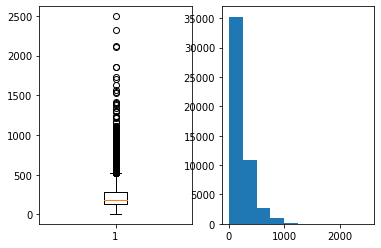

In [9]:
# Summarize review length
print("Review length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
# plot review length as a boxplot and histogram
plt.subplot(121)
plt.boxplot(result)
plt.subplot(122)
plt.hist(result)
plt.show()

Mirando el BoxPlot y el histograma para las longitudes de revisión en palabras, probablemente podamos ver una distribución exponencial que probablemente podamos cubrir la masa de la distribución con una longitud recortada de 400 a 500 palabras.

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section2"></a>
# <font color="#004D7F" size=6>2. Incrustar palabras</font>

Un avance reciente en el campo del procesamiento del lenguaje natural se llama incrustación de palabras _(word embeddings)._ Se trata de una técnica en la que las palabras se codifican como vectores de valor real en un espacio de alta dimensión, donde la similitud entre palabras en términos de significado se traduce en cercanía en el espacio vectorial. Las palabras discretas se asignan a vectores de números continuos. Esto es útil cuando se trabaja con problemas de lenguaje natural con redes neuronales, ya que necesitamos números como valores de entrada.

Keras proporciona una forma conveniente de convertir representaciones enteras positivas de palabras en una incrustación de palabras mediante una capa de incrustación 4. La capa toma argumentos que definen el mapeo, incluido el número máximo de palabras esperadas, también llamado tamaño de vocabulario (por ejemplo, el valor entero más grande que se verá como entrada). La capa también le permite especificar la dimensionalidad de cada vector de palabra, denominada dimensión de salida.

Nos gustaría utilizar una representación de incrustación de palabras para el conjunto de datos de IMDB. Supongamos que solo nos interesan las primeras 5,000 palabras más utilizadas en el conjunto de datos. Por lo tanto, nuestro tamaño de vocabulario será de 5,000. Podemos optar por utilizar un vector de 32 dimensiones para representar cada palabra. Finalmente, podemos optar por limitar la extensión máxima de la reseña a 500 palabras, truncando las reseñas más largas y rellenando las reseñas más cortas con valores 0. Cargaríamos el conjunto de datos de IMDB de la siguiente manera:

```python
    imdb.load_data(num_words=5000)
```

Luego, usaríamos la utilidad Keras para truncar o rellenar el conjunto de datos a una longitud de 500 para cada observación usando la función `sequence.pad_sequences()`.

```python
    X_train = sequence.pad_sequences(X_train, maxlen=500)
    X_test = sequence.pad_sequences(X_test, maxlen=500)
```

Finalmente, más adelante, la primera capa de nuestro modelo sería una capa de incrustación de palabras creada usando la clase `Embedding` de la siguiente manera:

```python
    Embedding(5000, 32, input_length=500)
```

La salida de esta primera capa sería una matriz con el tamaño de $32 × 500$ para un entrenamiento de revisión de película determinado o un patrón de prueba en formato entero. Ahora que sabemos cómo cargar el conjunto de datos de IMDB en Keras y cómo usar una representación de incrustación de palabras para ello, desarrollemos y evaluemos algunos modelos.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Puede obtener más información sobre la clase [Embedding](http://keras.io/layers/embeddings/)


---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section3"></a>
# <font color="#004D7F" size=6>3. Multilayer Perceptron</font>

Podemos comenzar desarrollando un modelo MLP con una sola capa oculta. La palabra incrustación de representación es una verdadera innovación y demostraremos lo que se habría considerado resultados de clase mundial en 2011 con una red neuronal relativamente simple. 

<a id="section3.1"></a>
# <font color="#004D7F" size=5>3.1. Librería y dataset</font>

Comencemos importando las clases y funciones necesarias para este modelo.

A continuación, cargaremos el conjunto de datos IMDB. Simplificaremos el conjunto de datos como se discutió durante la sección sobre incrustaciones de palabras. Solo se cargarán las 5.000 palabras principales. También usaremos una división del 50% / 50% del conjunto de datos en entrenamiento y prueba. Ésta es una buena metodología de división estándar.

In [3]:
# MLP for the IMDB problem
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)


<a id="section3.2"></a>
# <font color="#004D7F" size=5>3.2. Extraer número de reseñas</font>

Limitaremos las reseñas a 500 palabras, truncando las reseñas más largas y eliminando las reseñas más cortas.

In [4]:
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

<a id="section3.3"></a>
# <font color="#004D7F" size=5>3.3. Desarrollar MLP</font>

Ahora podemos crear nuestro modelo. Usaremos
1. Una capa de incrustación como capa de entrada, estableciendo el vocabulario en 5,000, el tamaño del vector de la palabra en 32 dimensiones y la longitud de entrada en 500. 
2. La salida de esta primera capa será una matriz de tamaño $32 × 500$ como se discutió en la sección anterior. sección.
3. Aplanaremos la salida de las capas de incrustación a una dimensión.
4. Luego usaremos una capa oculta densa de 250 unidades con una función de activación ReLu. 
5. La capa de salida tiene una neurona y utilizará una activación sigmoidea para generar valores de 0 y 1 como predicciones. 
6. El modelo utiliza pérdida logarítmica y se optimiza mediante ADAM.

In [12]:
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 16000)             0         
_________________________________________________________________
dense (Dense)                (None, 250)               4000250   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________


<a id="section3.4"></a>
# <font color="#004D7F" size=5>3.4. Evaluación del modelo</font>

Podemos ajustar el modelo y usar el conjunto de pruebas como validación durante el entrenamiento. Este modelo se adapta muy rápidamente, por lo que usaremos muy pocas épocas de entrenamiento, en este caso solo 2. 

Hay muchos datos, por lo que usaremos un tamaño de batch de 128. 

In [13]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/2
196/196 - 8s - loss: 0.4839 - accuracy: 0.7421 - val_loss: 0.2946 - val_accuracy: 0.8754
Epoch 2/2
196/196 - 8s - loss: 0.1802 - accuracy: 0.9313 - val_loss: 0.3124 - val_accuracy: 0.8708
Accuracy: 87.08%


Podemos ver que este modelo muy simple alcanza una puntuación cercana al 87,23% que se encuentra en la vecindad del artículo original, con muy poco esfuerzo.

Estoy seguro de que podemos hacerlo mejor si entrenamos esta red, quizás usando una incorporación más grande y agregando más capas ocultas. Probemos con un tipo de red diferente.

---
<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<a id="section4"></a>
# <font color="#004D7F" size=6>4. CNN Unidimensional </font>

Las redes neuronales convolucionales se diseñaron para honrar la estructura espacial en los datos de la imagen y al mismo tiempo ser robustas a la posición y orientación de los objetos aprendidos en la escena. Este mismo principio se puede utilizar en secuencias, como la secuencia unidimensional de palabras en una reseña de películas.

Las mismas propiedades que hacen atractivo el modelo de CNN para aprender a reconocer objetos en imágenes pueden ayudar a aprender la estructura en párrafos de palabras, es decir, las técnicas de invarianza a la posición específica de las características.

<a id="section4.1"></a>
# <font color="#004D7F" size=5>4.1. Librería y dataset</font>

Keras admite convoluciones unidimensionales y agrupación mediante las clases `Conv1D` y `MaxPooling1D`, respectivamente. Nuevamente, importemos las clases y funciones necesarias, además del dataset IMDB

In [14]:
# CNN for the IMDB problem
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
# pad dataset to a maximum review length in words
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

<a id="section4.2"></a>
# <font color="#004D7F" size=5>4.2. Desarrollar la CNN</font>

Ahora podemos definir nuestro modelo de red neuronal convolucional. Esta vez:

1. Después de la capa de entrada Embedding, insertamos una capa **Conv1D.** 
    * Esta capa convolucional tiene 32 mapas de características y lee representaciones de palabras incrustadas 3 elementos vectoriales de la palabra incrustada a la vez. 
2. La capa convolucional va seguida de una capa **MaxPooling1D** con una longitud y un paso de 2 que divide a la mitad el tamaño de los mapas de características de la capa convolucional. 
3. El resto de la red es igual que la red neuronal anterior.

In [16]:
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
____________________________________________

<a id="section4.3"></a>
# <font color="#004D7F" size=5>4.3. Evaluación del modelo</font>

Podemos ver que nuestra capa convolucional conserva la dimensionalidad de nuestra capa de entrada de incrustación de entrada de 32 dimensiones con un máximo de 500 palabras. La capa de agrupación comprime esta representación dividiéndola a la mitad. La ejecución del ejemplo ofrece una mejora pequeña sobre el modelo de red neuronal anterior con una precisión de casi el 88,66%.

In [17]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/2
196/196 - 11s - loss: 0.4472 - accuracy: 0.7653 - val_loss: 0.2707 - val_accuracy: 0.8869
Epoch 2/2
196/196 - 11s - loss: 0.2118 - accuracy: 0.9180 - val_loss: 0.2702 - val_accuracy: 0.8869
Accuracy: 88.69%


Nuevamente, hay muchas oportunidades para una mayor optimización, como el uso de capas convolucionales más profundas y / o más grandes. Una idea interesante es configurar la capa de agrupación máxima para usar una longitud de entrada de 500. Esto comprimiría cada mapa de características en un solo vector de 32 longitudes y podría aumentar el rendimiento.

<div style="text-align: right"> <font size=5> <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a></font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>